# Telemetry & Solver Diagnostics

Explore a sample heuristic telemetry log and visualise convergence metrics.

**Telemetry analysis not found**: generate reports

In [1]:
import sys
from pathlib import Path

PROJECT_ROOT = Path.cwd().resolve()
while PROJECT_ROOT != PROJECT_ROOT.parent and not (PROJECT_ROOT / "pyproject.toml").exists():
    PROJECT_ROOT = PROJECT_ROOT.parent
if not (PROJECT_ROOT / "pyproject.toml").exists():
    raise RuntimeError(
        "Notebook must be executed within a FHOPS checkout (pyproject.toml not found)."
    )
if str(PROJECT_ROOT) not in sys.path:
    sys.path.insert(0, str(PROJECT_ROOT))


import json

import matplotlib.pyplot as plt
import pandas as pd

TELEMETRY_PATH = PROJECT_ROOT / "docs/examples/analytics/data/telemetry_minitoy.jsonl"
with TELEMETRY_PATH.open("r", encoding="utf-8") as f:
    telemetry = [json.loads(line) for line in f]
telemetry_df = pd.DataFrame(telemetry)
telemetry_df.head()

,iteration,objective,accepted,temperature
0,0,200,10,1.000000
1,50,195,11,0.500000
2,100,190,12,0.333333
3,150,185,13,0.250000
4,200,180,14,0.200000


## Objective Trace

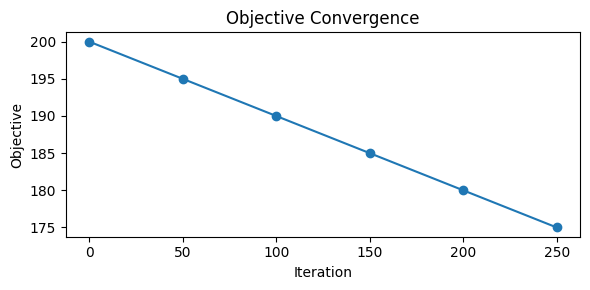

In [2]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(telemetry_df["iteration"], telemetry_df["objective"], marker="o")
ax.set_xlabel("Iteration")
ax.set_ylabel("Objective")
ax.set_title("Objective Convergence")
fig.tight_layout()

## Acceptance Summary

In [3]:
telemetry_df[["iteration", "accepted", "temperature"]]

,iteration,accepted,temperature
0,0,10,1.000000
1,50,11,0.500000
2,100,12,0.333333
3,150,13,0.250000
4,200,14,0.200000
5,250,15,0.166667
